In [530]:
import numpy as np
import pandas as pd
import argparse
import matplotlib.pyplot as plt
# allow multiple outputs in one cell in jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [531]:
# %qtconsole

In [532]:
norm_data = pd.read_csv('/Users/cgu3/Documents/Crispr/report/all_sample/all_sample.normalized.txt', sep='\t', header=0)
# get number of rows
len(norm_data)

103650

In [533]:
# aggregate sgRNAs with the same gene symbol and remove sgRNA column
gene_norm_data = norm_data.groupby(norm_data['Gene']).sum()

# find genes has non-zero in sample_het_1 and zero value in sample_wt_1
het_specific_group_1 = gene_norm_data[(gene_norm_data['sample_het_1'] > 0) & (gene_norm_data['sample_wt_1'] == 0)].loc[:, ['sample_het_1', 'sample_wt_1']]
# find genes has non-zero in sample_wt_1 and zero value in sample_het_1
wt_specific_group_1 = gene_norm_data[(gene_norm_data['sample_wt_1'] > 0) & (gene_norm_data['sample_het_1'] == 0)].loc[:, ['sample_het_1', 'sample_wt_1']]
# find genes has non-zero in sample_het_6 and zero value in sample_wt_6
het_specific_group_6 = gene_norm_data[(gene_norm_data['sample_het_6'] > 0) & (gene_norm_data['sample_wt_6'] == 0)].loc[:, ['sample_het_6', 'sample_wt_6']]
# find genes has non-zero in sample_wt_6 and zero value in sample_het_6
wt_specific_group_6 = gene_norm_data[(gene_norm_data['sample_wt_6'] > 0) & (gene_norm_data['sample_het_6'] == 0)].loc[:, ['sample_het_6', 'sample_wt_6']]

# extract the gene symbol from the index in het_specific_group_1 as list
het_specific_group_1_gene_list = het_specific_group_1.index.tolist()
het_specific_group_6_gene_list = het_specific_group_6.index.tolist()
wt_specific_group_1_gene_list = wt_specific_group_1.index.tolist()
wt_specific_group_6_gene_list = wt_specific_group_6.index.tolist()

In [534]:
# remove sgRNA and Gene column
norm_data_numeric = norm_data.drop(columns=['sgRNA', 'Gene'])
# find the minimum non-zero value in norm_data
non_zero_min = norm_data_numeric[norm_data_numeric > 0].min().min()
# replace zero value with the minimum non-zero value
norm_data = norm_data.replace(0, non_zero_min)

In [535]:
# remove part before "_[0-9]+" in column sgRNA
norm_data['sgRNA_index'] = norm_data['sgRNA'].str.extract(r'_(\d+)', expand=False)

In [536]:
# remove sgRNAs start with negative_control
neg_controls = norm_data[norm_data.sgRNA.str.startswith('negative_control')]
norm_data = norm_data[~norm_data.sgRNA.str.startswith('negative_control')]
norm_data

,sgRNA,Gene,sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6,sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6,sgRNA_index
4340,0610007P14Rik_1,0610007P14Rik,0.627188,389.058524,0.627188,729.949448,1780.814259,733.702853,822.263554,758.173612,274.774916,527.465362,0.627188,0.627188,1
4341,ACE3_1,ACE3,978.250049,1725.777947,0.627188,910.950487,166.177374,0.627188,0.627188,0.627188,0.627188,0.627188,103.478459,0.627188,1
4342,ACE3_2,ACE3,0.627188,249.854098,0.627188,288.676840,1337.408286,1626.248591,0.627188,134.084407,128.228294,310.458210,305.659449,0.627188,2
4343,ACE3_3,ACE3,115.557032,221.299344,0.627188,257.629217,492.939613,0.627188,193.942615,525.105427,291.261410,1154.026477,1414.470940,0.627188,3
4344,ACE3_4,ACE3,901.544088,0.627188,1764.894555,404.279694,575.229370,2477.192621,790.382576,794.678267,288.513661,417.080221,429.037612,779.470102,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103645,Zzz3_1,Zzz3,374.564174,305.178934,1104.882335,517.900784,209.319576,0.627188,0.627188,116.534092,284.849996,419.588974,472.816960,0.627188,1
103646,Zzz3_2,Zzz3,3108.085696,1229.639096,1637.267883,500.064916,138.214835,0.627188,1.328374,128.468306,0.627188,325.510729,212.528836,0.627188,2
103647,Zzz3_3,Zzz3,0.627188,416.720942,0.627188,188.928092,391.475544,0.627188,2.656748,443.671965,1348.228919,528.719739,429.833600,0.627188,3
103648,Zzz3_4,Zzz3,0.627188,0.627188,0.627188,204.782198,458.585637,0.627188,189.957493,698.502540,528.483754,575.758862,394.014133,823.758176,4


In [537]:
# slice column Gene  sample_het_1 and sample_wt_1
# norm_data_1 = norm_data[['sgRNA_index', 'Gene', 'sample_het_1', 'sample_wt_1']]
# genes_to_label = ['Prok2', 'Dgkk', 'Nr3c2', 'Hif1a', 'Smyd2', 'Zcchc13', 'Ecsit', 'Dgkg', 'Pik3ca', 'Atf1']
# 
norm_data_1 = norm_data[['sgRNA_index', 'Gene', 'sample_het_6', 'sample_wt_6']].copy()
norm_data_1.rename(columns={'sample_het_6': 'sample_het_1', 'sample_wt_6': 'sample_wt_1'}, inplace=True)
genes_to_label = ['Pus1', 'Glo1', 'Chuk', 'Ppard', 'Mapk3', 'Eif2ak2', 'Map2k2', 'Wnt1', 'Gli3', 'Hdac4']
norm_data_1

,sgRNA_index,Gene,sample_het_1,sample_wt_1
4340,1,0610007P14Rik,0.627188,733.702853
4341,1,ACE3,0.627188,0.627188
4342,2,ACE3,0.627188,1626.248591
4343,3,ACE3,0.627188,0.627188
4344,4,ACE3,779.470102,2477.192621
...,...,...,...,...
103645,1,Zzz3,0.627188,0.627188
103646,2,Zzz3,0.627188,0.627188
103647,3,Zzz3,0.627188,0.627188
103648,4,Zzz3,823.758176,0.627188


In [538]:
# pivot_wide the table and use the index as column name 
norm_data_1 = norm_data_1.pivot(index='Gene', columns='sgRNA_index', values=['sample_het_1', 'sample_wt_1'])
# remove row if all value in the row is 0
norm_data_1 = norm_data_1.loc[(norm_data_1 != 0).any(axis=1)]
# remove if the row has NaN value
norm_data_1 = norm_data_1.dropna()
# remove if row all has the same value
norm_data_1 = norm_data_1.loc[(norm_data_1['sample_het_1'] != norm_data_1['sample_wt_1']).any(axis=1)]

In [539]:
norm_data_1

sample_het_1                                                     \
sgRNA_index              1           2            3            4            5   
Gene                                                                            
0610007P14Rik     0.627188    0.627188  1335.285431     0.627188   538.100099   
0610009B22Rik     0.627188  241.370003     0.627188     0.627188   389.735051   
0610009D07Rik     0.627188    0.627188     0.627188     0.627188     0.627188   
0610009O20Rik   666.535513    0.627188   385.306244     0.627188     0.627188   
0610010F05Rik     0.627188    0.627188     0.627188     0.627188     0.627188   
...                    ...         ...          ...          ...          ...   
Zyx               0.627188    0.627188     0.627188     0.627188     0.627188   
Zzef1             0.627188    0.627188     0.627188     0.627188  2314.051866   
Zzz3              0.627188    0.627188     0.627188   823.758176     0.627188   
a                 0.627188    0.627188     0.627188  1096.129831     0.627188   
l7Rn6             0.627188    0.627188     0.627188   418.522299     0.627188   

               sample_wt_1                                                      
sgRNA_index              1            2            3            4            5  
Gene                                                                            
0610007P14Rik   733.702853    26.473814     0.627188     0.627188     0.627188  
0610009B22Rik     3.781973     0.627188     3.781973     0.627188     0.627188  
0610009D07Rik     3.781973   975.749155  1168.629801     0.627188     0.627188  
0610009O20Rik   571.077994     0.627188     0.627188     3.781973     0.627188  
0610010F05Rik  1319.908740     0.627188     0.627188     0.627188     0.627188  
...                    ...          ...          ...          ...          ...  
Zyx             669.409304  1274.525058   620.243649  1130.810067     0.627188  
Zzef1             0.627188     0.627188  1240.487297     0.627188  1036.260730  
Zzz3              0.627188     0.627188     0.627188     0.627188     0.627188  
a                 0.627188  1266.961111     0.627188     0.627188  1187.539669  
l7Rn6             0.627188     0.627188     0.627188  1331.254660     0.627188  

[18555 rows x 10 columns]

In [540]:
['_'.join(col).strip() for col in norm_data_1.columns.values]

['sample_het_1_1',
 'sample_het_1_2',
 'sample_het_1_3',
 'sample_het_1_4',
 'sample_het_1_5',
 'sample_wt_1_1',
 'sample_wt_1_2',
 'sample_wt_1_3',
 'sample_wt_1_4',
 'sample_wt_1_5']

In [541]:
# perform wilcoxon signed-rank test for each row in the dataframe between sample_het_1 and sample_wt_1 and extract the z score
from scipy.stats import wilcoxon, ranksums
norm_data_1['pvalue'] = norm_data_1.apply(lambda x: ranksums(x['sample_het_1'], x['sample_wt_1']).pvalue, axis=1)
# calculate the log2 fold change
norm_data_1['LFC'] = np.log2(norm_data_1['sample_het_1'].mean(axis=1) / norm_data_1['sample_wt_1'].mean(axis=1))

In [542]:
neg_controls_1 = neg_controls[['sgRNA_index', 'Gene', 'sample_het_1', 'sample_wt_1']]
# remove row if all value in the row is 0
neg_controls_1 = neg_controls_1.loc[(neg_controls_1 != 0).any(axis=1)]

In [543]:
# len(neg_controls_1)
# # get all permutation of 5 number from 0 to 4339
# from itertools import combinations
# combs = list(combinations(range(len(neg_controls_1)), 5))

In [544]:
# random draw 5 rows from neg_controls_1
len_genes = len(norm_data_1)
ntc_LFC = np.zeros(len_genes)
ntc_pvalue = np.zeros(len_genes)
i = 0
while True:
    if i == len_genes:
        break
    test = neg_controls_1.sample(n=5)
    # if  np.all((test['sample_het_1'] - test['sample_wt_1']) == 0):
        # continue
    # calculate the wilcoxon signed-rank statistic
    ntc_pvalue[i] = ranksums(test['sample_het_1'], test['sample_wt_1']).pvalue
    ntc_LFC[i] = np.log2(test['sample_het_1'].mean() / test['sample_wt_1'].mean())
    i+=1
    

# combine p-value and LFC to a dataframe
ntc_data = pd.DataFrame({'pvalue': ntc_pvalue, 'LFC': ntc_LFC}, index=['NTC_%d' % i for i in range(0, len_genes)])

In [557]:
df = norm_data_1[[('pvalue', ''), ('LFC', '')]]
df.columns=['pvalue', 'LFC']
# combine the negative control data with the data from the sample
df = pd.concat([df, ntc_data])
# remove row if p-value is NaN
df = df.dropna()
df['gene_score'] = df['LFC'] * (-np.log10(df['pvalue']))
# add index as column to the dataframe "Gene"
df['Gene'] = df.index
# add jitter to the p-value
df['pvalue'] = df['pvalue'] + np.random.uniform(-0.03, 0.03, len(df))
# cap p-value between 0 and 1
df['pvalue'] = df['pvalue'].clip(0.01, 1)

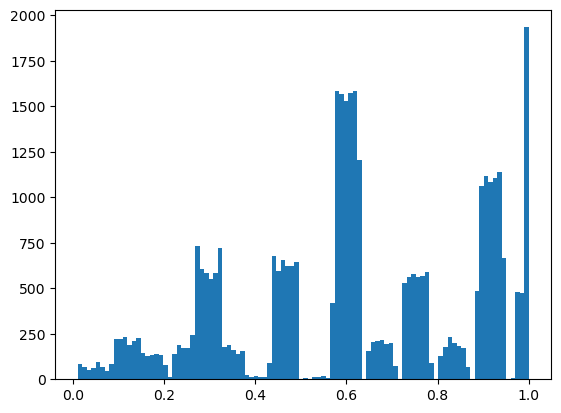

In [558]:
# hist plot of the p-value
plt.hist(df['pvalue'], bins=100);

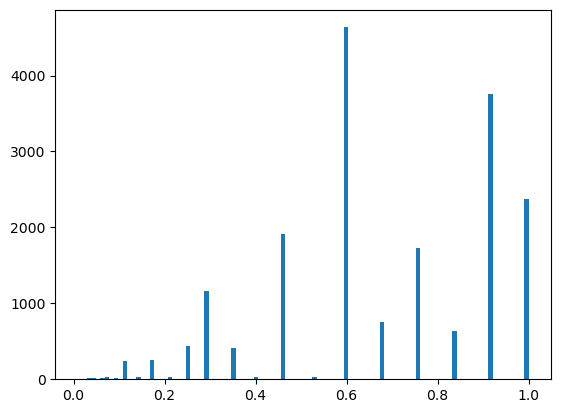

In [559]:
# plot hist of negative control p-value
plt.hist(ntc_pvalue, bins=100);

In [560]:
def product_threshold_fdr(df, fdr=0.05):
    maxi = abs(df['gene_score']).max()
    for pro in np.arange(0, maxi, 0.01):
        df_thres = df[abs(df['gene_score']) > pro]
        if (1.0 * len(df_thres[df_thres['Gene'].str.contains('NTC')]) / len(df_thres)) < fdr:
            break
    return pro, df_thres

In [561]:
fdr = 0.20
thres, df_hits = product_threshold_fdr(df, fdr)
# df.sort_values('product', ascending=False).to_csv(output_folder + '/' + output_name + '_all_genes.csv', index=False)
# df_hits.sort_values('product', ascending=False).to_csv(
#     output_folder + '/' + output_name + '_fdr%s_product%s_hits.csv' % (fdr, thres), index=False)
df_ntc = df[df['Gene'].str.contains('NTC')]

Text(9.992724907863638, 0.6471175579687983, 'Chuk')

Text(9.745096474733382, 1.7882694948354527, 'Eif2ak2')

Text(9.650472953274077, 0.31748038344958185, 'Gli3')

Text(-2.4275395101763526, 0.20847851960057762, 'Glo1')

Text(9.590952349661837, 0.31504225225493854, 'Hdac4')

Text(9.52295104729429, 0.6559687457571819, 'Map2k2')

Text(10.170061647735649, 1.1504355109512605, 'Mapk3')

Text(9.61082818570595, 1.7971237080747673, 'Ppard')

Text(-2.9253800314288823, 0.20651232824734042, 'Pus1')

Text(9.598856588225898, 0.32280278412910063, 'Wnt1')

(-14.867285200655784, 14.867285200655784)

(0.0, 2.5)

Text(0.5, 0, 'Ndufs4+/+        Phenotype         Ndufs4+/-')

Text(0, 0.5, '-log10 P')

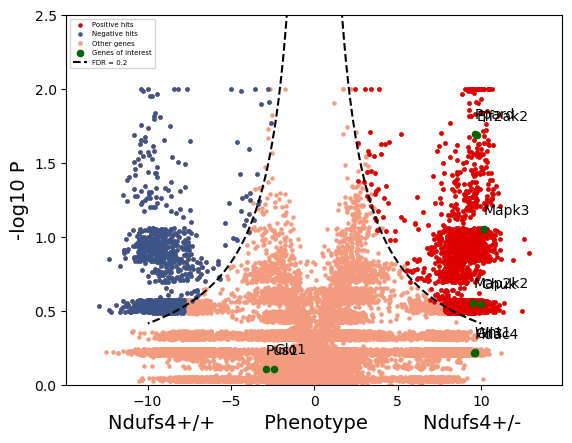

In [562]:
df_pos = df_hits[df_hits['LFC'] > 0]
df_neg = df_hits[df_hits['LFC'] < 0]
plt.scatter(df_pos['LFC'], -np.log10(df_pos['pvalue']), c="#DC0000FF", s=5, label='Positive hits')
plt.scatter(df_neg['LFC'], -np.log10(df_neg['pvalue']), c="#3C5488FF", s=5, label='Negative hits')
plt.scatter(df['LFC'], -np.log10(df['pvalue']), c='#F39B7FFF', s=5, label='Other genes')
plt.scatter(df_pos['LFC'], -np.log10(df_pos['pvalue']), c="#DC0000FF", s=5, label=None)
plt.scatter(df_neg['LFC'], -np.log10(df_neg['pvalue']), c="#3C5488FF", s=5, label=None)
# plt.scatter(df_ntc['LFC'], -np.log10(df_ntc['pvalue']), c='grey', s=5, label="Negative control")
genes = list(df['Gene'])
phenotype = list(df['LFC'])
p_value = list(-np.log10(df['pvalue']))
i = 0
for x, y, s in zip(phenotype, p_value, genes):
    if s in genes_to_label:
        plt.annotate(s, (x, y + 0.1), fontsize=10, color='black')
        if i == 0:
            plt.scatter(x, y, c='darkgreen', s=20, label='Genes of interest')
        else:
            plt.scatter(x, y, c='darkgreen', s=20)
        i = 1
# if str(label_all_sig_genes) == '1':
#     genes = list(df_hits['gene'])
#     phenotype = list(df_hits['LFC'])
#     p_value = list(-np.log10(df_hits['pvalue']))
#     for x, y, s in zip(phenotype, p_value, genes):
#         plt.annotate(s, (x, y), fontsize=16)

x = np.arange(0.01, 10, 0.01)
y = [thres / i for i in x]
plt.plot(x, y, '--', c='k', )
plt.plot(-x, y, '--', c='k', label='FDR = %s' % fdr)
lim = max(abs(df['LFC'].min() - 1), (df['LFC'].max() + 2))
plt.xlim(-lim, lim)
plt.ylim(0, -np.log10(df['pvalue'].min()) + 0.5)
plt.legend(loc=2, fontsize=5, fancybox=True)
plt.xlabel('Ndufs4+/+        Phenotype         Ndufs4+/-', fontsize=14)
plt.ylabel('-log10 P', fontsize=14)
# plt.title(output_name, fontsize=18)
# plt.savefig(output_folder + "/" + output_name + '_volcano_plot.pdf')
plt.show()

In [551]:
# histogram of the wilcoxon signed-rank statistic
# plt.hist(ntc_pvalue, bins=100);
# # plot histogram of the wilcoxon signed-rank statistic
# plt.hist(norm_data_1['pvalue'], bins=100);

In [552]:
# def permutation_p(statistic):
#     upper = np.mean(statistic > stats_null_dist)
#     lower = np.mean(statistic < stats_null_dist)
#     return 2 * min(upper, lower)
#     
# # calculate the p-value based on null distribution from negative control
# norm_data_1['pvalue'] = norm_data_1['statistic'].apply(permutation_p)
# # np.mean(norm_data_1['statistic'][0] < stats_null_dist)

In [553]:
plot_data = df[['Gene', 'gene_score', 'LFC', 'pvalue']]
# sort the data in acsending order
plot_data = plot_data.sort_values(by='gene_score')
# add jitter to the statistic
# plot_data['statistic'] = plot_data['statistic'] + np.random.uniform(-0.05, 0.05, len(plot_data))
# add a column from 1 to the length of the data
plot_data = plot_data.reset_index()
# create a column to store the color of the data point, if the gene is in het_specific_group_1, set the color to red, if the gene is in wt_specific_group_1, set the color to blue, otherwise set the color to black
plot_data['color'] = 'black'
# get index of rows that the column Gene is in het_specific_group_1_gene_list
# get the column idx that is 'color' in the dataframe
# set the color of the data point to red

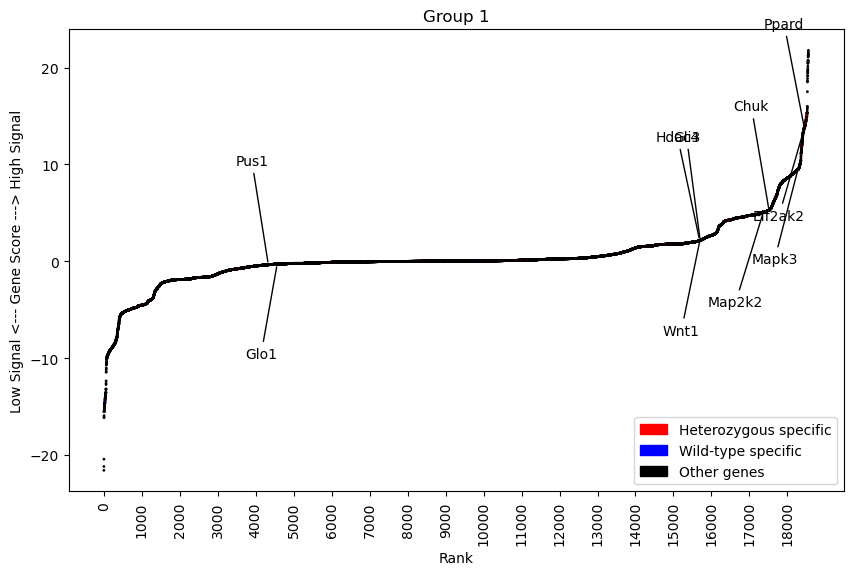

In [554]:
# only keep data without NTC in the gene symbol
scatter_plot_data = plot_data[~plot_data['Gene'].str.contains('NTC')].copy()
scatter_plot_data.reset_index(inplace=True, drop=True)
scatter_plot_data.loc[np.where(scatter_plot_data['Gene'].isin(het_specific_group_1_gene_list))[0], 'color'] = 'red'
scatter_plot_data.loc[np.where(scatter_plot_data['Gene'].isin(wt_specific_group_1_gene_list))[0], 'color'] = 'blue'
import matplotlib.patches as mpatches
import random

plt.figure(figsize=(10, 6));
# plot the point of  data and use position as x-axis
li = plt.scatter(y=scatter_plot_data['gene_score'], x=list(scatter_plot_data.index), marker='o', s=1, c=scatter_plot_data['color']);
plt.xlabel('Rank');
plt.ylabel('Low Signal <--- Gene Score ---> High Signal');
plt.title('Group 1');
# legend for three colors red, blue and black with corresponding labels HET, WT and Other
# plot a x-axis tick "100" every 100 points with gene symbol as label
plt.xticks(range(0, len(scatter_plot_data), 1000),  rotation=90);

scatter_plot_data.loc[:, 'x'] = li.get_offsets().data[:,0]
scatter_plot_data.loc[:, 'y'] = li.get_offsets().data[:,1]
# get location of the gene symbol: Prok2, Dgkk, Nr3c2, Hif1a, Smyd2, Zcchc13, Ecsit, Dgkg, Pik3ca, Atf1
annot_data = scatter_plot_data.loc[scatter_plot_data['Gene'].isin(genes_to_label)]
annot_data.reset_index(inplace=True, drop=True)
# annotate the gene symbol with arrow to the data point in the annot_data
for i in range(len(annot_data)):
    y_offset = 10 if i % 2 == 0 else -10
    # x_offset = 5000 if annot_data.iloc[i]['gene_score'] < 0 else 5000
    plt.annotate(
        annot_data.iloc[i]['Gene'],
        xy=(annot_data.iloc[i]['x'], annot_data.iloc[i]['y']),
        xytext=(annot_data.iloc[i]['x'], annot_data.iloc[i]['y']+ y_offset),
        arrowprops=dict(facecolor='black',  arrowstyle="-"),
        horizontalalignment='right', verticalalignment='bottom'
    );

red_patch = mpatches.Patch(color='red', label='Heterozygous specific')
blue_patch = mpatches.Patch(color='blue', label='Wild-type specific')
black_patch = mpatches.Patch(color='black', label='Other genes')
# plot legend at bottom right location
plt.legend(handles=[red_patch, blue_patch, black_patch], loc='lower right', fontsize=10);
plt.show();

In [477]:
rnk

,gene_score
Gene,
A4gnt,-4.632288
AA386476,8.731127
AA467197,7.514223
AF067063,5.267034
AI314180,9.400356
...,...
Zswim2,9.003916
Zswim8,-5.280802
Zxdc,8.559385


In [478]:
import gseapy as gp
rnk = df_hits.loc[:, ['Gene', 'gene_score']]
# remove NTC from the gene symbol
rnk = rnk[~rnk['Gene'].str.contains('NTC')]
# remove Rik from the gene symbol
rnk = rnk[~rnk['Gene'].str.contains('Rik')]
# use Gene as index
rnk = rnk.set_index('Gene')
# remove Gene column
rnk = rnk.iloc[:, [0]]
pos= list(rnk[rnk['gene_score'] > 0].index)
neg = rnk[rnk['gene_score'] < 0].index.str

# enr = gp.enrichr(gene_list=pos, # or "./tests/data/gene_list.txt",
#                  gene_sets='../../library/m5.go.bp.v2023.2.Mm.symbols.gmt',
#                  organism='Mus musculus', # don't forget to set organism to the one you desired! e.g. Yeast
#                  outdir=None, # don't write to disk
#                  )


pre_res = gp.prerank(rnk=rnk, # or rnk = rnk,
                     gene_sets='../../library/m5.go.bp.v2023.2.Mm.symbols.gmt',
                     threads=4,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True # see what's going on behind the scenes
                     )

2024-04-10 16:00:15,440 [WARNING] Duplicated values found in preranked stats: 24.15% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-10 16:00:15,442 [INFO] Parsing data files for GSEA.............................
2024-04-10 16:00:15,812 [INFO] 4683 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-04-10 16:00:15,813 [INFO] 3113 gene_sets used for further statistical testing.....
2024-04-10 16:00:15,814 [INFO] Start to run GSEA...Might take a while..................
2024-04-10 16:00:30,271 [INFO] Congratulations. GSEApy runs successfully................



In [479]:
pre_res.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,GOBP_RECEPTOR_INTERNALIZATION,0.585935,2.185739,0.0,0.373795,0.213,11/17,18.11%,Pcsk9;Arf1;Ins1;Synj1;Htr1b;Dkk1;Hip1;Synj2bp;...
1,prerank,GOBP_REGULATION_OF_RECEPTOR_INTERNALIZATION,0.642798,2.112562,0.0,0.455965,0.437,8/12,18.11%,Pcsk9;Arf1;Synj1;Dkk1;Hip1;Synj2bp;Lrrtm1;Ptpn5
2,prerank,GOBP_VENTRICULAR_SYSTEM_DEVELOPMENT,-0.722993,-2.065257,0.004878,1.0,0.768,5/6,17.44%,Nfix;Coro1c;Wdr89;Tsku;Ccdc134
3,prerank,GOBP_AXON_EXTENSION,0.483532,2.021531,0.001497,0.781245,0.743,14/23,24.66%,Auts2;Nrp2;Rab21;Rpl4;Trpv2;Barhl2;Islr2;Sema5...
4,prerank,GOBP_NEURON_PROJECTION_EXTENSION,0.434958,1.95405,0.004317,1.0,0.912,17/29,26.43%,Auts2;Nrp2;Rab21;Rpl4;Unc13a;Trpv2;Barhl2;Islr...
...,...,...,...,...,...,...,...,...,...,...
3108,prerank,GOBP_DETECTION_OF_EXTERNAL_STIMULUS,0.084697,0.36278,0.998623,1.0,1.0,2/27,6.77%,Opn3;Pkd1l2
3109,prerank,GOBP_EPIGENETIC_REGULATION_OF_GENE_EXPRESSION,-0.063263,-0.355318,1.0,0.999878,1.0,8/33,19.31%,Cdk2;Ubr5;Msl1;Dnmt3a;Dnmt3l;Spty2d1;Cbx3;Smyd5
3110,prerank,GOBP_PHAGOCYTOSIS_ENGULFMENT,0.124088,0.353983,1.0,1.0,1.0,8/8,87.62%,Alox15;Ager;Xkr6;Fcgr3;Megf10;Trem2;Thbs1;Abca7
3111,prerank,GOBP_NEGATIVE_REGULATION_OF_PROTEIN_CONTAINING...,0.085343,0.346559,1.0,0.999962,1.0,12/23,48.69%,Vdac2;Dkk1;Svil;Lmod2;Add3;Stmn1;Kif14;Mkks;Da...


In [480]:
# enr.res2d

# filter the result with p-value < 0.05
pre_res_cutoff =  pre_res.res2d[pre_res.res2d['NOM p-val'] < 0.20].copy()
# remove GOBP from Term
pre_res_cutoff['Term'] = pre_res_cutoff['Term'].str.replace('GOBP_', '')
# keep only NES with positive values
pos_res = pre_res_cutoff[pre_res_cutoff['NES'] > 0]
neg_res = pre_res_cutoff[pre_res_cutoff['NES'] < 0]
# keep the top 5 positive NES
pos_genes = pos_res.sort_values(by='NES', ascending=False)[:5]
neg_genes = neg_res.sort_values(by='NES', ascending=True)[:5]

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

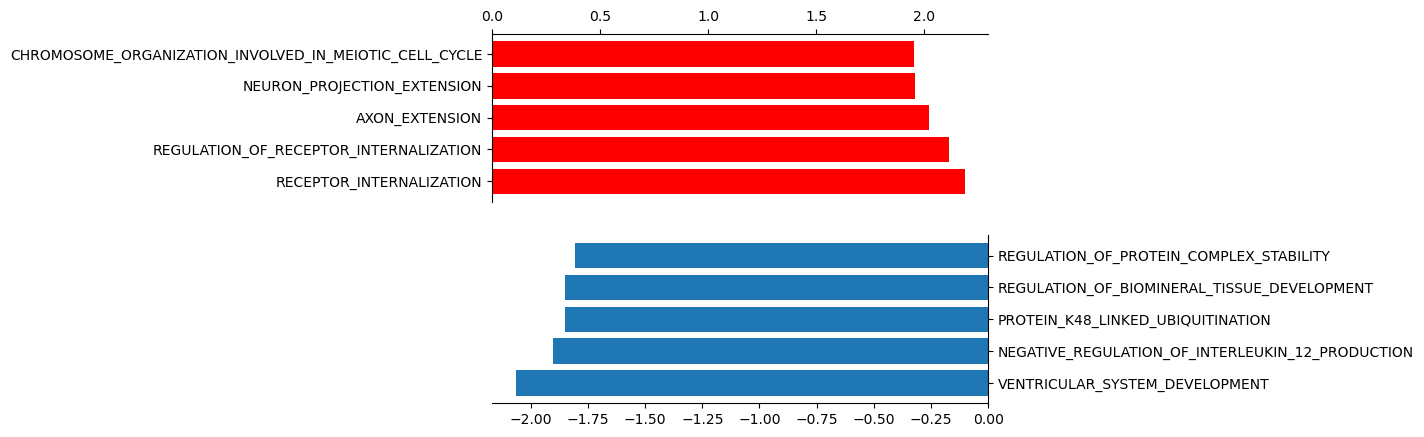

In [481]:
# barplot NES
fig, ax = plt.subplots(2)

# plt.subplots_adjust(top=0.9)
ax[0].barh(pos_genes['Term'], pos_genes['NES'], color='red')
ax[0].xaxis.tick_top()
ax[1].barh(neg_genes['Term'], neg_genes['NES'])
ax[1].yaxis.tick_right()

ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)


ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)

In [482]:
# npg = ["#E64B35B2", "#4DBBD5B2", "#00A087B2", "#3C5488B2", "#F39B7FB2", "#8491B4B2", "#91D1C2B2", "#DC0000B2",
#        "#7E6148B2"]
# 
# df_hits = plot_data
# df_hits['pvalue'] = df_hits['pvalue'].astype(float)
# df = df_hits
# # add random jitter to the pvalue in the data
# df['pvalue'] = df['pvalue'] + np.random.uniform(-0.03, 0.03, len(df))
# 
# plt.figure(figsize=[10, 8])
# df_pos = df_hits[df_hits['statistic'] > 0]
# df_neg = df_hits[df_hits['statistic'] < 0]
# # add jitter to the data points
# plt.scatter(df_pos['statistic'], -np.log10(df_pos['pvalue'] + 1), c="#DC0000FF", s=1, label='Positive hits');
# plt.scatter(df_neg['statistic'], -np.log10(df_neg['pvalue'] + 1), c="#3C5488FF", s=1, label='Negative hits');
# plt.scatter(df['statistic'], -np.log10(df['pvalue'] + 1), c='#F39B7FFF', s=5, label='Other genes');
# plt.scatter(df_pos['statistic'], -np.log10(df_pos['pvalue'] + 1), c="#DC0000FF", s=1, label=None);
# plt.scatter(df_neg['statistic'], -np.log10(df_neg['pvalue'] + 1), c="#3C5488FF", s=1, label=None);
# genes = list(df['Gene'])
# phenotype = list(df['statistic'])
# p_value = list(-np.log(df['pvalue'] + 1))
# i = 0
# # for x, y, s in zip(phenotype, p_value, genes):
# #     if s in genes_to_label:
# #         plt.annotate(s, (x, y), fontsize=16)
# #         if i == 0:
# #             plt.scatter(x, y, c='darkgreen', s=20, label='Genes of interest')
# #         else:
# #             plt.scatter(x, y, c='darkgreen', s=20)
# #         i = 1
# # if str(label_all_sig_genes) == '1':
# #     genes = list(df_hits['gene'])
# #     phenotype = list(df_hits['statistic'])
# #     p_value = list(-np.log10(df_hits['pvalue']))
# #     for x, y, s in zip(phenotype, p_value, genes):
# #         plt.annotate(s, (x, y), fontsize=16)
# 
# # x = np.arange(0.01, 10, 0.01)
# # y = [thres / i for i in x]
# # plt.plot(x, y, '--', c='k', )
# # plt.plot(-x, y, '--', c='k', label='FDR = %s' % fdr)
# lim = max(abs(df['statistic'].min() - 1), (df['statistic'].max() + 2))
# plt.xlim(-lim, lim)
# # plt.ylim(0, -np.log10(df['pvalue'].min() + 1) + 0.5)
# plt.legend(fontsize='large', fancybox=True, loc='lower right');
# plt.xlabel('Phenotype', fontsize=14);
# plt.ylabel('-log10 P', fontsize=14);
# # plt.title(output_name, fontsize=18)
# # plt.savefig(output_folder + "/" + output_name + '_volcano_plot.pdf')
# plt.show()

In [483]:
# random draw 5 rows from the dataframe negative control and calculate the wilcoxon signed-rank statistic
neg_controls['statistic'] = neg_controls.apply(lambda x: wilcoxon(x['sample_het_1'], x['sample_wt_1'], method='auto').statistic, axis=1)

/Users/cgu3/anaconda3/envs/mageckenv/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

In [ ]:
np.mean(norm_data_1['statistic'] < 0.10)